## Perkenalan

Bab pengenalan harus diisi dengan identitas, gambaran besar dataset yang digunakan, dan objective yang ingin dicapai.

<b>Nama:</b> RohMad <br/>
<b>Phase:</b> 1<br/>
<b>Type: </b> Milestone 1
<br/>
<b>Dataset:</b> The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.
<br/>

bank client data:
- age (numeric)
- job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
- marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
- education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
- default: has credit in default? (categorical: 'no','yes','unknown')
- housing: has housing loan? (categorical: 'no','yes','unknown')
- loan: has personal loan? (categorical: 'no','yes','unknown')

related with the last contact of the current campaign:
- contact: contact communication type (categorical: 'cellular','telephone')
- month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
- day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
- duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

other attributes:
- campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
- pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
- previous: number of contacts performed before this campaign and for this client (numeric)
- poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

social and economic context attributes
- emp.var.rate: employment variation rate - quarterly indicator (numeric)
- cons.price.idx: consumer price index - monthly indicator (numeric)
- cons.conf.idx: consumer confidence index - monthly indicator (numeric)
- euribor3m: euribor 3 month rate - daily indicator (numeric)
- nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
- y - has the client subscribed a term deposit? (binary: 'yes','no')
<br/> 
<b>Link:</b> https://archive.ics.uci.edu/ml/datasets/Bank+Marketing
<br/>
<b>Objective:</b> The classification goal is to predict if the client will subscribe a term deposit

## Import pustaka yang dibutuhkan

Cell pertama pada notebook harus berisi dan hanya berisi semua library yang digunakan dalam project.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

#Import Model Machine Learning
import xgboost as xgb
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import train_test_split

## Data Loading

Bagian ini berisi proses data loading yang kemudian dilanjutkan dengan explorasi data secara sederhana.

In [2]:
df_raw = pd.read_csv('./data/bank-additional-full.csv', sep=';')

In [3]:
print(df_raw.shape)
df_raw.head(5)

(41188, 21)


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

## Data Cleaning

Bagian ini berisi proses penyiapan data berupa data cleaning sebelum dilakukan explorasi data lebih lanjut. Proses cleaning dapat berupa memberi nama baru untuk setiap kolom, mengisi missing values, menghapus kolom yang tidak dipakai, dan lain sebagainya.

In [5]:
df_raw.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [6]:
df_raw.rename(columns={'y': 'subcribed'}, inplace=True)

##### Chek duplicated values

In [7]:
df_raw.duplicated().sum()

12

In [8]:
(~df_raw.duplicated()).sum()

41176

Bisa dilihat bahwa terdapat 12 row/values yang terduplikasi dan ada 41176 values yang tidak terduplikasi

In [9]:
df_raw.loc[df_raw.duplicated(keep='first'), :]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subcribed
1266,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
12261,36,retired,married,unknown,no,no,no,telephone,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.966,5228.1,no
14234,27,technician,single,professional.course,no,no,no,cellular,jul,mon,...,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
16956,47,technician,divorced,high.school,no,yes,no,cellular,jul,thu,...,3,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
18465,32,technician,single,professional.course,no,yes,no,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,no
20216,55,services,married,high.school,unknown,no,no,cellular,aug,mon,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,no
20534,41,technician,married,professional.course,no,yes,no,cellular,aug,tue,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no
25217,39,admin.,married,university.degree,no,no,no,cellular,nov,tue,...,2,999,0,nonexistent,-0.1,93.200,-42.0,4.153,5195.8,no
28477,24,services,single,high.school,no,yes,no,cellular,apr,tue,...,1,999,0,nonexistent,-1.8,93.075,-47.1,1.423,5099.1,no
32516,35,admin.,married,university.degree,no,yes,no,cellular,may,fri,...,4,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no


Untuk melihat row/value yang teruduplikasi, dan kita akan menyimpan 12 values yang pertama dan akan menghapus sisanya.

In [10]:
df_raw.drop_duplicates(keep='first', inplace=True)

Sekarang kita lihat apakah masih ada row/values yang terduplikasi

In [11]:
df_raw.duplicated().sum()

0

In [12]:
df_raw.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41176.00000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000
mean,40.02380,258.315815,2.567879,962.464810,0.173013,0.081922,93.575720,-40.502863,3.621293,5167.034870
std,10.42068,259.305321,2.770318,186.937102,0.494964,1.570883,0.578839,4.627860,1.734437,72.251364
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


Bisa kita lihat bahwa untuk kategori umur memiliki rentang usia 17-95 tahun, usia terendah adalah 17 tahun dan usia tertinggi adalah 98 tahun, rata-rata umur adalalh 40 tahun.

## Explorasi Data

Bagian ini berisi explorasi data pada dataset diatas dengan menggunakan query, grouping, visualisasi sederhana, dan lain sebagainya.

In [13]:
df_raw.head(2)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subcribed
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


#####  Selecting Educatin

In [14]:
df_raw.set_index("education", inplace = True)

In [15]:
df_raw.drop(index=['basic.4y','basic.6y','basic.9y','illiterate','unknown'], inplace=True)

In [16]:
df_raw.reset_index(level=0, inplace=True)

In [17]:
df_raw.head()

,education,age,job,marital,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subcribed
0,high.school,57,services,married,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,high.school,37,services,married,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,high.school,56,services,married,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,professional.course,59,admin.,married,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,professional.course,24,technician,single,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


##### Filltering age

In [18]:
df_filt = df_raw[df_raw["age"] <= 80]

#### Visualisasi Sederhana

In [19]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "Ploting"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

Saving figure attribute_histogram_plots


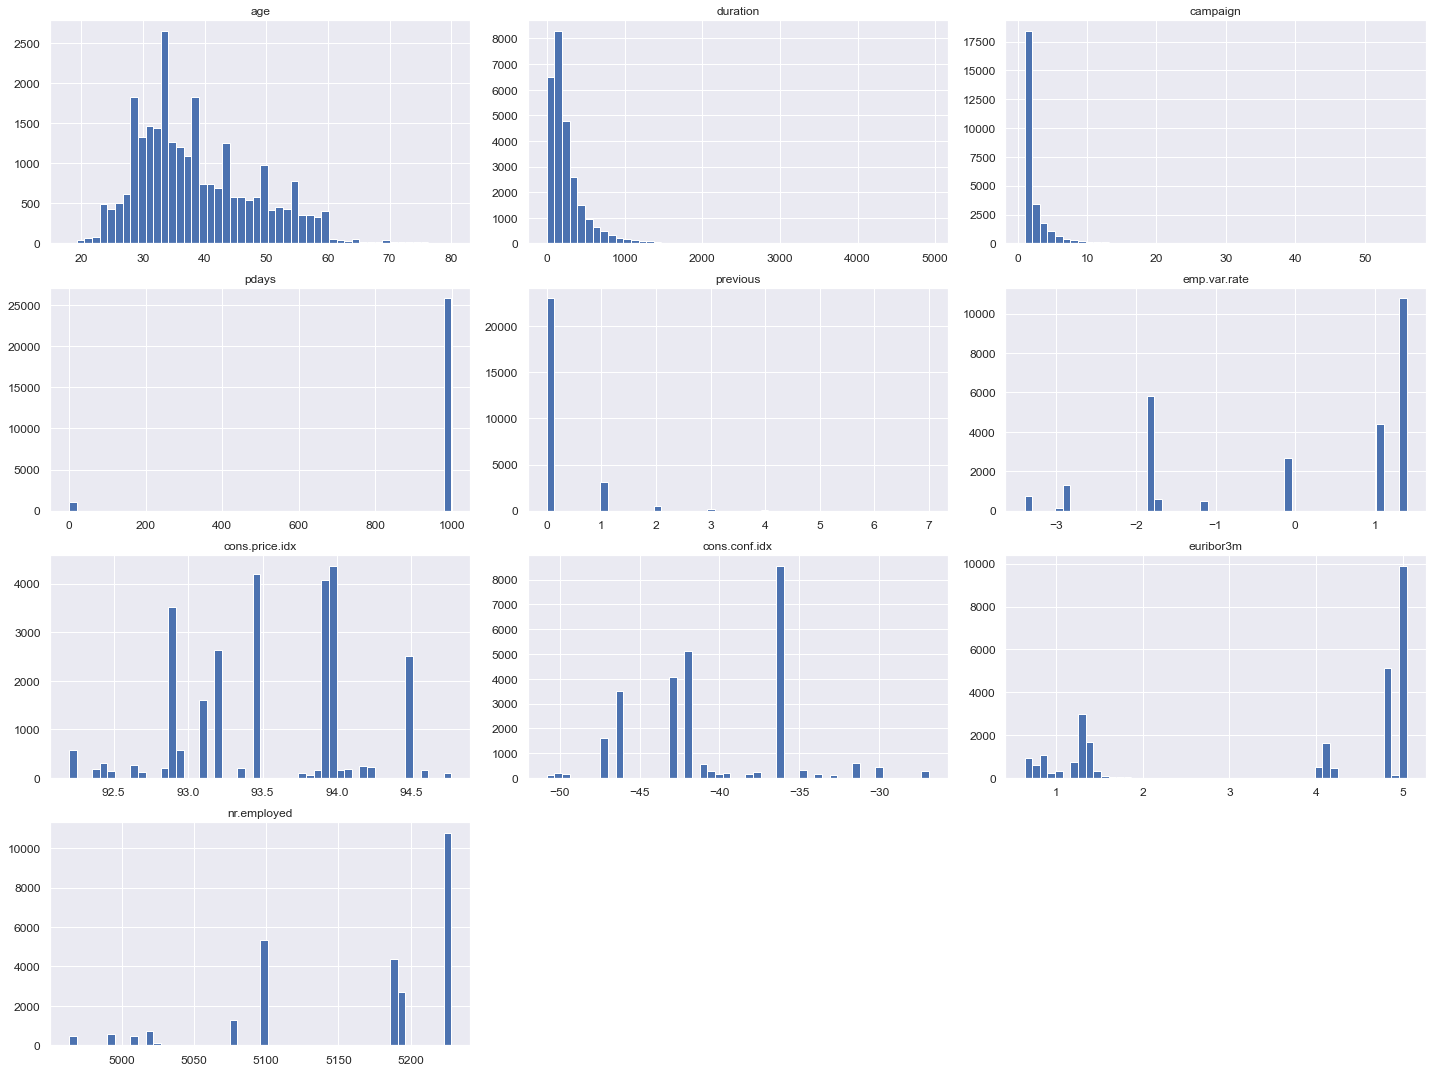

In [20]:
df_filt.hist(bins=50, figsize=(20,15))
save_fig("attribute_histogram_plots")
plt.show()

 - Rata-rata age ada diangke 30 tahun, terlihat durasi skew ke kanan artinya data tidak terdistribusi dengan normal.
 - Smua data memiliki banyak outliers.

## Data Preprocessing

Bagian ini berisi proses penyiapan data untuk proses pelatihan model, seperti pembagian data menjadi train-val-test, transformasi data (normalisasi, encoding, dll.), dan proses-proses lain yang dibutuhkan.

#### Encoding (Dummiying)

In [21]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df_filt['job'] = le.fit_transform(df_filt['job'])
df_filt['marital'] = le.fit_transform(df_filt['marital'])
df_filt['education'] = le.fit_transform(df_filt['education'])
df_filt['housing'] = le.fit_transform(df_filt['housing'])
df_filt['poutcome'] = le.fit_transform(df_filt['poutcome'])
df_filt['loan'] = le.fit_transform(df_filt['loan'])
df_filt['subcribed'] = le.fit_transform(df_filt['subcribed'])
df_filt.head(3)

,education,age,job,marital,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subcribed
0,0,57,7,1,unknown,0,0,telephone,may,mon,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,0,37,7,1,no,2,0,telephone,may,mon,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,0,56,7,1,no,0,2,telephone,may,mon,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0


#### Creating Feature and Target

In [22]:
feature_cols = [
    'age', 'job', 'marital', 'education', 'housing','poutcome', 'loan',
    'duration', 'previous','cons.conf.idx'
]
df_train = df_filt
X = df_train[feature_cols]
y = df_train['subcribed']

In [23]:
print(df_train.shape)
X.head(2)

(26891, 21)


,age,job,marital,education,housing,poutcome,loan,duration,previous,cons.conf.idx
0,57,7,1,0,0,1,0,149,0,-36.4
1,37,7,1,0,2,1,0,226,0,-36.4


<AxesSubplot:>

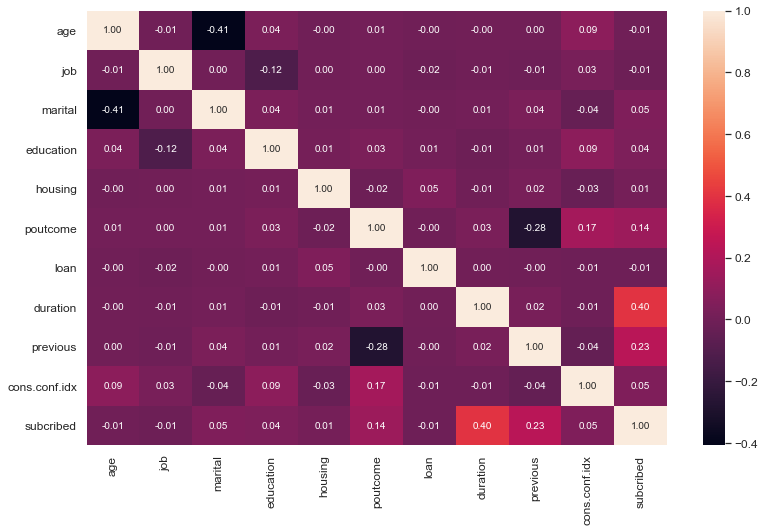

In [24]:
plt.figure(figsize=(13,8))
sns.heatmap(df_filt[feature_cols+['subcribed']].corr(), annot=True, fmt='.2f')

Dari data korelasi antar kolom, bisa kita lihat bahwa duration memiliki relasi yang cukup kuat yaitu 0.40 dari kolom yang lain diikuti dengan previous yaitu 0.23, bisa kita simpulkan bahwa duration dan previous memilki pengaruh yang besar terhadap target subscribed(tertarik obligasi/tidak). Sedangkan age,job, dan loan adalah kolom yang tidak memilki relasi terhadap target subscribed, bisa kita simpulkan bahwa age,job, dan loan tidak berpengaruh dengan target subscribed.

#### Splitting Data

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=77)

In [26]:
print('X_train:',X_train.shape)
print('X_test :',X_test.shape)
print('y_train:',y_train.shape)
print('y_test:',y_test.shape)

X_train: (18823, 10)
X_test : (8068, 10)
y_train: (18823,)
y_test: (8068,)


#### Normalisasi/Standarization

In [27]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [28]:
X_train_trf = scaler.fit_transform(X_train)
X_test_trf = scaler.transform(X_test)

## Pendefinisian Model

Bagian ini berisi cell untuk mendefinisikan model sampai kompilasi model. Akan lebih bagus jika didahului dengan penjelasan mengapa memilih arsitektur atau jenis model tertentu, alasan memilih nilai hyperparameter, dan hal lain yang berkaitan.

<b>Model yang digunakan adalah 6 model tipe Clasification, ini bermaksud untuk mengklasifikasiakn antara variabel feature dengan variabel target, dan membandingkan mana model algoritma terbaik.</b>

### 1. Model Logistic Regression

Nilai hyperparamater yang digunakan disini adalah {C': 100, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'},  berdasarkan perhitungan Grid Seacrh Cross Validation sebagai pencari nilai parameter terbaik.

### 2. Model SVM (Support Vector Machine)

Nilai hyperparamater yang digunakan disini adalah {'kernel': 'rbf', 'gamma': 0.1, 'C': 1}, berdasarkan Randomize Seacrh Cross Validation sebagai pencari nilai parameter terbaik.

### 3. Model Decision Tree

Nilai hyperparamater yang digunakan disini adalah {'criterion': 'entropy', 'max_depth': 8, 'min_samples_leaf': 18, 'min_samples_split': 2, 'splitter': 'best'}, berdasarkan GridSeacrh Cross Validation sebagai pencari nilai parameter terbaik.

### 4. Model Random Forest

Nilai hyperparamater yang digunakan disini adalah {'n_estimators': 20, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 60, 'bootstrap': False}, berdasarkan Randomize Seacrh Cross Validation sebagai pencari nilai parameter terbaik.

### 5. Model KNN (K-Neighboard Nearest)

Nilai hyperparamater yang digunakan disini adalah {'weights': 'distance', 'n_neighbors': 1, 'metric': 'euclidean', 'leaf_size': 8}, berdasarkan Randomize Seacrh Cross Validation sebagai pencari nilai parameter terbaik.

### 6. Model Naive Bayes

Nilai hyperparamater yang digunakan disini adalah {'var_smoothing': 0.0533669923120631}, berdasarkan Randomize Seacrh Cross Validation sebagai pencari nilai parameter terbaik.

### 7. Model XGBoost

Model yang digunakan adalah XGBoost, ini saya gunakan bertujuan untuk membandingkan atara 6 Model yang sudah ada, dengan alasan XGBoost salah satu keluarga decission tree terbaik selain Random Forest

Nilai hyperparamater yang digunakan disini adalah {'n_estimators': 40, 'min_child_weight': 15, 'max_depth': 10, 'gamma': 3, 'colsample_bytree': 0.9}, berdasarkan Randomize Seacrh Cross Validation sebagai pencari nilai parameter terbaik.

## Pelatihan Model

Cell pada bagian ini hanya berisi code untuk melatih model dan output yang dihasilkan.

### 1. Model Logistic Regression

In [284]:
model_logreg = LogisticRegression(max_iter=10, random_state=77)
%time model_logreg.fit(X_train_trf, y_train)

Wall time: 51.2 ms


LogisticRegression(max_iter=10, random_state=77)

### 2. Model SVM (Support Vector Machine)

In [289]:
model_svc = SVC(kernel='rbf', random_state=77)
%time model_svc.fit(X_train_trf, y_train)

Wall time: 8.75 s


SVC(random_state=77)

### 3. Model Decision Tree

In [290]:
model_tree = DecisionTreeClassifier(max_depth=4, random_state=77)
%time model_tree.fit(X_train_trf, y_train)

Wall time: 49.8 ms


DecisionTreeClassifier(max_depth=4, random_state=77)

In [32]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(77)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "Decision_trees"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

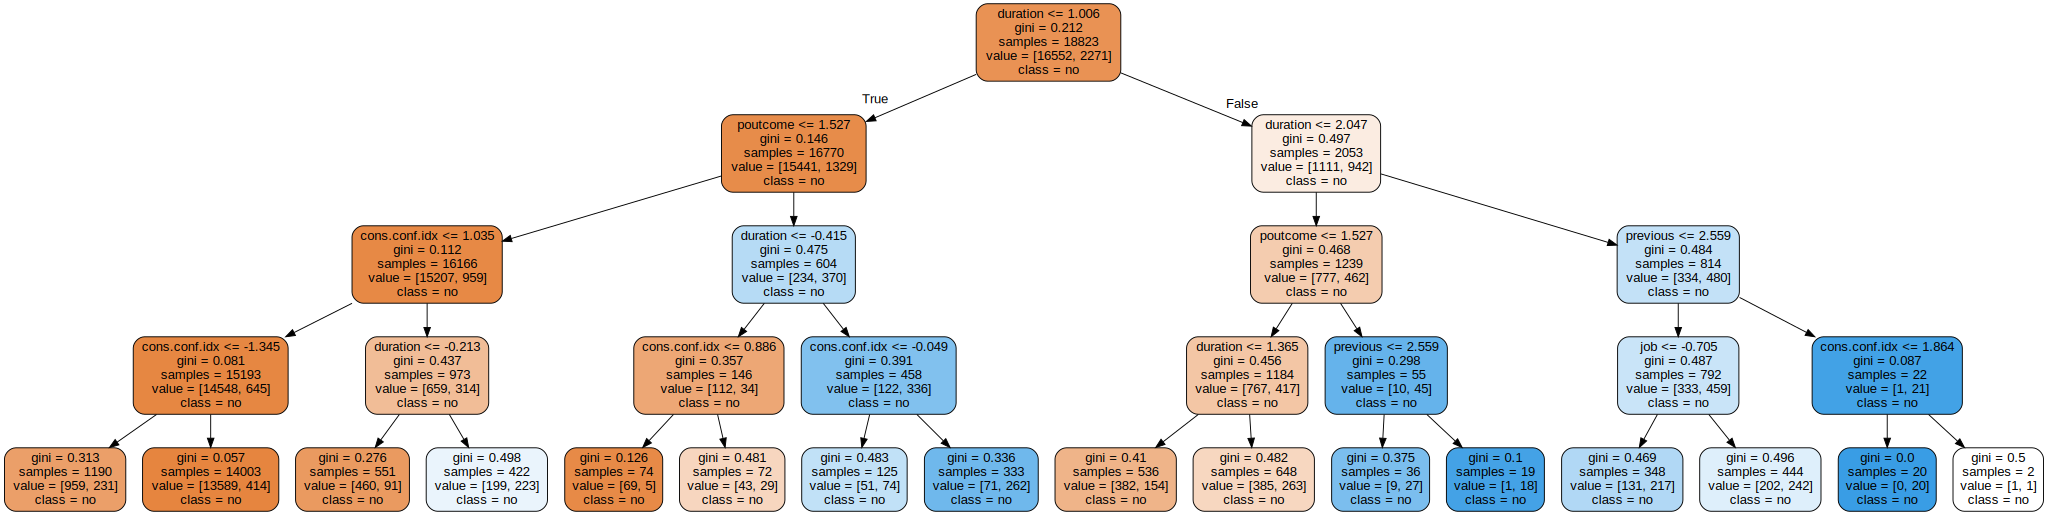

In [33]:
from graphviz import Source
from sklearn.tree import export_graphviz

export_graphviz(
        model_tree,
        out_file=os.path.join(IMAGES_PATH, "deposit.dot"),
        feature_names=X_train.columns, # kolom dari fitur  
        class_names=df_raw.subcribed,  # dari target
        filled=True,
        rounded=True
    )

Source.from_file(os.path.join(IMAGES_PATH, "deposit.dot"))

### 4. Model Random Forest

In [291]:
model_rf = RandomForestClassifier(n_estimators=10,random_state=77)
%time model_rf.fit(X_train_trf, y_train)

Wall time: 462 ms


RandomForestClassifier(n_estimators=10, random_state=77)

### 5. Model KNN (K-Nearest Neighbors)

In [292]:
model_knn = KNeighborsClassifier(n_neighbors=4)
%time model_knn.fit(X_train_trf, y_train)

Wall time: 226 ms


KNeighborsClassifier(n_neighbors=4)

### 6. Model Naive Bayes

In [293]:
model_gnb = GaussianNB()
%time model_gnb.fit(X_train_trf, y_train)

Wall time: 19.8 ms


GaussianNB()

### 7. XGBoost

In [294]:
model_xgb = xgb.XGBClassifier(n_estimators=10,random_state=77)
%time model_xgb.fit(X_train_trf, y_train)

[14:18:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Wall time: 318 ms


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=10, n_jobs=4, num_parallel_tree=1, random_state=77,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

## Evaluasi Model

Pada bagian ini, dilakukan evaluasi model yang harus menunjukkan bagaimana performa model berdasarkan metrics yang dipilih. Hal ini harus dibuktikan dengan visualisasi tren performa dan/atau tingkat kesalahan model.

### 1. Model Logistic Regression

##### Scoring

In [285]:
y_train_pred = model_logreg.predict(X_train_trf)
y_test_pred = model_logreg.predict(X_test_trf)

In [286]:
# MSE, MAE, R2, RMSE Method One
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

#TRAIN
print("TRAIN RESULT :\n================================================")
print(f'MSE: {mean_squared_error(y_train,y_train_pred): .2f}')
print(f'RMSE:{np.sqrt(mean_squared_error(y_train,y_train_pred)): .2f}')
print(f'r2: {r2_score(y_train,y_train_pred): .2f}')
#TEST
print("TEST RSEULT:\n================================================")
print(f'MSE: {mean_squared_error(y_test,y_test_pred): .2f}')
print(f'MAE: {mean_absolute_error(y_test,y_test_pred): .2f}')
print(f'RMSE: {np.sqrt(mean_squared_error(y_test,y_test_pred)): .2f}')
print(f'r2: {r2_score(y_test,y_test_pred): .2f}')

TRAIN RESULT :
MSE:  0.11
RMSE: 0.33
r2: -0.01
TEST RSEULT:
MSE:  0.11
MAE:  0.11
RMSE:  0.33
r2:  0.02


In [288]:
from sklearn.metrics import classification_report

print(classification_report(y_train, y_train_pred))
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94     16552
           1       0.64      0.26      0.37      2271

    accuracy                           0.89     18823
   macro avg       0.77      0.62      0.66     18823
weighted avg       0.87      0.89      0.87     18823

              precision    recall  f1-score   support

           0       0.90      0.98      0.94      7053
           1       0.68      0.27      0.39      1015

    accuracy                           0.89      8068
   macro avg       0.79      0.63      0.67      8068
weighted avg       0.88      0.89      0.87      8068



#### Logistic Regression Hyperparameter Tunning

##### Fungsi print_score

In [40]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def print_score(clf, X_train_trf, y_train, X_test_trf, y_test, train=True):
    if train:
        pred = clf.predict(X_train_trf)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("TRAIN AFTER TUNING RESULT:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(X_test_trf)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("TEST AFTER TUNING RESULT:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

##### Tunning GridSearchCV

In [43]:
#Tunning GridSearchCV
from sklearn.model_selection import GridSearchCV

penality = ['l1', 'l2', 'elasticnet']
c = [100, 10, 1.0, 0.1, 0.01]
solver = ['lbfgs', 'liblinear', 'saga']
max_iter = [100, 500, 1000]

params = {
    'penalty': penality,
    'C': c,
    'solver': solver,
    'max_iter': max_iter
}

log_clf = LogisticRegression(random_state=77)
log_cv = GridSearchCV(log_clf, params, scoring="accuracy", n_jobs=-1, verbose=1, cv=3)
log_cv.fit(X_train_trf, y_train)
best_params = log_cv.best_params_
print(f"Best paramters: {best_params})")

log_clf = LogisticRegression(**best_params)
%time log_clf.fit(X_train_trf, y_train)
print_score(log_clf, X_train_trf, y_train, X_test_trf, y_test, train=True)
print_score(log_clf, X_train_trf, y_train, X_test_trf, y_test, train=False)

Fitting 3 folds for each of 135 candidates, totalling 405 fits
Best paramters: {'C': 100, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'})
Wall time: 30.1 ms
TRAIN AFTER TUNING RESULT:
Accuracy Score: 89.29%
_______________________________________________
CLASSIFICATION REPORT:
                      0            1  accuracy     macro avg  weighted avg
precision      0.906488     0.635207  0.892897      0.770847      0.873758
recall         0.979217     0.263760  0.892897      0.621489      0.892897
f1-score       0.941450     0.372744  0.892897      0.657097      0.872835
support    16552.000000  2271.000000  0.892897  18823.000000  18823.000000
_______________________________________________
Confusion Matrix: 
 [[16208   344]
 [ 1672   599]]

TEST AFTER TUNING RESULT:
Accuracy Score: 89.27%
_______________________________________________
CLASSIFICATION REPORT:
                     0            1  accuracy    macro avg  weighted avg
precision     0.903588     0.684864  0.89266

##### Save score

In [44]:
scores = {
    'LogReg': {
        'Train': accuracy_score(y_train, model_logreg.predict(X_train_trf)),
        'Test': accuracy_score(y_test, model_logreg.predict(X_test_trf)),
    },
}

In [45]:
scores['LogReg'] = {
    'Train': accuracy_score(y_train, model_logreg.predict(X_train_trf)),
    'Test': accuracy_score(y_test, model_logreg.predict(X_test_trf)),
}

### 2. Model SVM (Suport Vector Machine)

##### Scoring

In [295]:
y_train_pred = model_svc.predict(X_train_trf)
y_test_pred = model_svc.predict(X_test_trf)

In [297]:
# MSE, MAE, R2, RMSE Method One
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

#TRAIN
print("TRAIN RESULT :\n================================================")
print(f'MSE: {mean_squared_error(y_train,y_train_pred): .2f}')
print(f'RMSE:{np.sqrt(mean_squared_error(y_train,y_train_pred)): .2f}')
print(f'r2: {r2_score(y_train,y_train_pred): .2f}')
#TEST
print("TEST RSEULT:\n================================================")
print(f'MSE: {mean_squared_error(y_test,y_test_pred): .2f}')
print(f'MAE: {mean_absolute_error(y_test,y_test_pred): .2f}')
print(f'RMSE: {np.sqrt(mean_squared_error(y_test,y_test_pred)): .2f}')
print(f'r2: {r2_score(y_test,y_test_pred): .2f}')

TRAIN RESULT :
MSE:  0.09
RMSE: 0.31
r2:  0.11
TEST RSEULT:
MSE:  0.11
MAE:  0.11
RMSE:  0.32
r2:  0.04


In [298]:
from sklearn.metrics import classification_report

print(classification_report(y_train, y_train_pred))
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.91      0.98      0.95     16552
           1       0.74      0.33      0.46      2271

    accuracy                           0.91     18823
   macro avg       0.83      0.66      0.70     18823
weighted avg       0.89      0.91      0.89     18823

              precision    recall  f1-score   support

           0       0.91      0.98      0.94      7053
           1       0.70      0.28      0.40      1015

    accuracy                           0.89      8068
   macro avg       0.80      0.63      0.67      8068
weighted avg       0.88      0.89      0.87      8068



#### SVM Hyperparameter Tunning

##### Fungsi print_score

In [127]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def print_score(clf, X_train_trf, y_train, X_test_trf, y_test, train=True):
    if train:
        pred = clf.predict(X_train_trf)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("TRAIN AFTER TUNING RESULT:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(X_test_trf)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("TEST AFTER TUNING RESULT:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

##### Tunning RandomizedSearchCV

In [128]:
#Tunning GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

kernel = ['rbf', 'poly', 'sigmoid']
c = [0.05, 1, 10, 100]
gamma = ['scale', 1, 0.1, 0.01, 0.001]

params = {
    'kernel': kernel,
    'C': c,
    'gamma': gamma,
}

svc_clf = SVC(random_state=77)
svc_cv = RandomizedSearchCV(svc_clf,
                      params,
                      scoring="accuracy",
                      n_jobs=-1,
                      verbose=1,
                      cv=3)
%time svc_cv.fit(X_train_trf, y_train)
best_params = svc_cv.best_params_
print(f"Best paramters: {best_params})")

svc_clf = SVC(**best_params)
svc_clf.fit(X_train_trf, y_train)
print_score(svc_clf, X_train_trf, y_train, X_test_trf, y_test, train=True)
print_score(svc_clf, X_train_trf, y_train, X_test_trf, y_test, train=False)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Wall time: 1min 8s
Best paramters: {'kernel': 'rbf', 'gamma': 0.1, 'C': 1})
TRAIN AFTER TUNING RESULT:
Accuracy Score: 90.54%
_______________________________________________
CLASSIFICATION REPORT:
                      0            1  accuracy     macro avg  weighted avg
precision      0.914380     0.745000  0.905382      0.829690      0.893945
recall         0.984594     0.328049  0.905382      0.656322      0.905382
f1-score       0.948189     0.455518  0.905382      0.701854      0.888748
support    16552.000000  2271.000000  0.905382  18823.000000  18823.000000
_______________________________________________
Confusion Matrix: 
 [[16297   255]
 [ 1526   745]]

TEST AFTER TUNING RESULT:
Accuracy Score: 89.46%
_______________________________________________
CLASSIFICATION REPORT:
                     0            1  accuracy    macro avg  weighted avg
precision     0.905160     0.699758  0.894646     0.802459      0.879319
r

##### Save score

In [54]:
scores['SVC'] = {
    'Train': accuracy_score(y_train, model_svc.predict(X_train_trf)),
    'Test': accuracy_score(y_test, model_svc.predict(X_test_trf)),
}

### 3. Model Decission Tree

##### Scoring

In [299]:
y_train_pred = model_tree.predict(X_train_trf)
y_test_pred = model_tree.predict(X_test_trf)

In [300]:
# MSE, MAE, R2, RMSE Method One
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

#TRAIN
print("TRAIN RESULT :\n================================================")
print(f'MSE: {mean_squared_error(y_train,y_train_pred): .2f}')
print(f'RMSE:{np.sqrt(mean_squared_error(y_train,y_train_pred)): .2f}')
print(f'r2: {r2_score(y_train,y_train_pred): .2f}')
#TEST
print("TEST RSEULT:\n================================================")
print(f'MSE: {mean_squared_error(y_test,y_test_pred): .2f}')
print(f'MAE: {mean_absolute_error(y_test,y_test_pred): .2f}')
print(f'RMSE: {np.sqrt(mean_squared_error(y_test,y_test_pred)): .2f}')
print(f'r2: {r2_score(y_test,y_test_pred): .2f}')

TRAIN RESULT :
MSE:  0.10
RMSE: 0.31
r2:  0.07
TEST RSEULT:
MSE:  0.10
MAE:  0.10
RMSE:  0.32
r2:  0.08


In [301]:
from sklearn.metrics import classification_report

print(classification_report(y_train, y_train_pred))
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.93      0.96      0.94     16552
           1       0.62      0.48      0.54      2271

    accuracy                           0.90     18823
   macro avg       0.78      0.72      0.74     18823
weighted avg       0.89      0.90      0.90     18823

              precision    recall  f1-score   support

           0       0.93      0.96      0.94      7053
           1       0.63      0.47      0.54      1015

    accuracy                           0.90      8068
   macro avg       0.78      0.71      0.74      8068
weighted avg       0.89      0.90      0.89      8068



#### Random Hyperparameter Tunning

##### Fungsi print_score

In [133]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def print_score(clf, X_train_trf, y_train, X_test_trf, y_test, train=True):
    if train:
        pred = clf.predict(X_train_trf)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("TRAIN AFTER TUNING RESULT:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(X_test_trf)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("TEST AFTER TUNING RESULT:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

##### Tunning GridSearchCV

In [134]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

params = {
    "criterion":("gini", "entropy"), 
    "splitter":("best", "random"), 
    "max_depth":(list(range(1, 20))), 
    "min_samples_split":[2, 3, 4], 
    "min_samples_leaf":list(range(1, 20)), 
}


tree_clf = DecisionTreeClassifier(random_state=77)
tree_cv = GridSearchCV(tree_clf, params, scoring="accuracy", n_jobs=-1, verbose=1, cv=3)
tree_cv.fit(X_train_trf, y_train)
best_params = tree_cv.best_params_
print(f"Best paramters: {best_params})")

tree_clf = DecisionTreeClassifier(**best_params)
tree_clf.fit(X_train_trf, y_train)
print_score(tree_clf, X_train_trf, y_train, X_test_trf, y_test, train=True)
print_score(tree_clf, X_train_trf, y_train, X_test_trf, y_test, train=False)

Fitting 3 folds for each of 4332 candidates, totalling 12996 fits
Best paramters: {'criterion': 'entropy', 'max_depth': 8, 'min_samples_leaf': 18, 'min_samples_split': 2, 'splitter': 'best'})
TRAIN AFTER TUNING RESULT:
Accuracy Score: 91.55%
_______________________________________________
CLASSIFICATION REPORT:
                      0            1  accuracy     macro avg  weighted avg
precision      0.946094     0.665855  0.915529      0.805975      0.912283
recall         0.958555     0.601937  0.915529      0.780246      0.915529
f1-score       0.952284     0.632285  0.915529      0.792284      0.913676
support    16552.000000  2271.000000  0.915529  18823.000000  18823.000000
_______________________________________________
Confusion Matrix: 
 [[15866   686]
 [  904  1367]]

TEST AFTER TUNING RESULT:
Accuracy Score: 90.38%
_______________________________________________
CLASSIFICATION REPORT:
                     0            1  accuracy    macro avg  weighted avg
precision     0.935

##### Train again

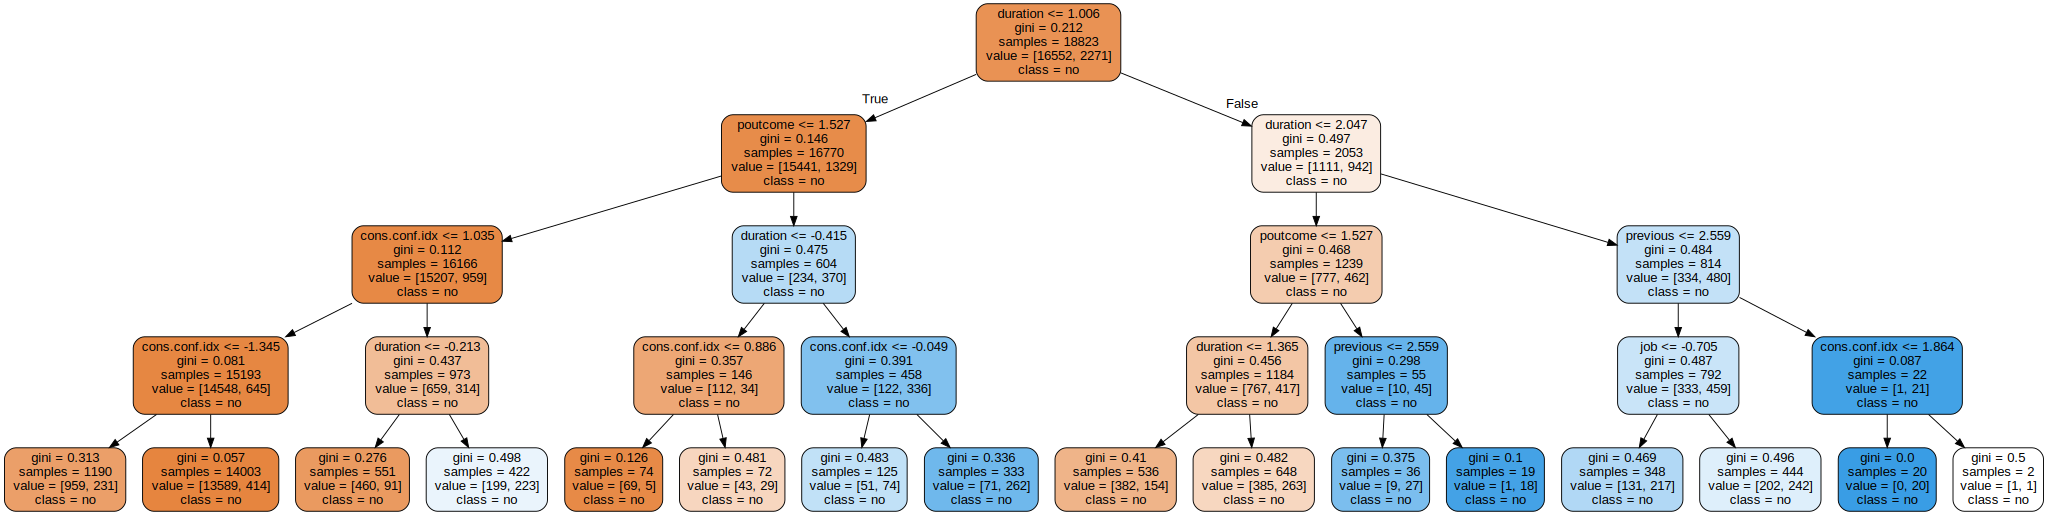

In [135]:
from graphviz import Source
from sklearn.tree import export_graphviz

export_graphviz(
        model_tree,
        out_file=os.path.join(IMAGES_PATH, "deposit_hyp.dot"),
        feature_names=X_train.columns, # kolom dari fitur  
        class_names=df_raw.subcribed,  # dari target
        filled=True,
        rounded=True
    )

Source.from_file(os.path.join(IMAGES_PATH, "deposit_hyp.dot"))

##### Save score

In [55]:
scores['Decision Tree'] = {
    'Train': accuracy_score(y_train, model_tree.predict(X_train_trf)),
    'Test': accuracy_score(y_test, model_tree.predict(X_test_trf)),
}

### 4. Model Random Forest

##### Scoring

In [314]:
y_train_pred = model_rf.predict(X_train_trf)
y_test_pred = model_rf.predict(X_test_trf)

In [303]:
# MSE, MAE, R2, RMSE Method One
from sklearn.metrics import mean_squared_error #MSE
from sklearn.metrics import mean_absolute_error #MAE
from sklearn.metrics import r2_score#R 2
 #TRAIN
print("TRAIN RESULT :\n================================================")
print(f'MSE: {mean_squared_error(y_train,y_train_pred): .2f}')
print(f'RMSE:{np.sqrt(mean_squared_error(y_train,y_train_pred)): .2f}')
print(f'r2: {r2_score(y_train,y_train_pred): .2f}')
 #TEST
print("TEST RSEULT:\n================================================")
print(f'MSE: {mean_squared_error(y_test,y_test_pred): .2f}')
print(f'MAE: {mean_absolute_error(y_test,y_test_pred): .2f}')
print(f'RMSE: {np.sqrt(mean_squared_error(y_test,y_test_pred)): .2f}')
print(f'r2: {r2_score(y_test,y_test_pred): .2f}')

TRAIN RESULT :
MSE:  0.01
RMSE: 0.09
r2:  0.92
TEST RSEULT:
MSE:  0.11
MAE:  0.11
RMSE:  0.33
r2:  0.01


In [304]:
from sklearn.metrics import classification_report

print(classification_report(y_train, y_train_pred))
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00     16552
           1       0.99      0.94      0.97      2271

    accuracy                           0.99     18823
   macro avg       0.99      0.97      0.98     18823
weighted avg       0.99      0.99      0.99     18823

              precision    recall  f1-score   support

           0       0.91      0.97      0.94      7053
           1       0.61      0.38      0.46      1015

    accuracy                           0.89      8068
   macro avg       0.76      0.67      0.70      8068
weighted avg       0.88      0.89      0.88      8068



#### Random Forest Hyperparameter Tunning

##### Fungsi print_score

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def print_score(clf, X_train_trf, y_train, X_test_trf, y_test, train=True):
    if train:
        pred = clf.predict(X_train_trf)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("TRAIN BEFORE TUNING RESULT:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(X_test_trf)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("TEST BEFORE TUNING RESULT:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

##### Tunning Randomized CV

Alasan mengapa memilih Randomized Cross Validation adalah karena Hyperparameter ini lebih ringan dibandingkan dengan Grid Cross Validation, jadi pada saat tunnig tidak membebani kerja komputer.

In [59]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start=10, stop=100, num=10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num=11)]
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators, 'max_features': max_features,
               'max_depth': max_depth, 'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf, 'bootstrap': bootstrap}

model_rf = RandomForestClassifier(random_state=77)

rf_grid_cv = RandomizedSearchCV(estimator=model_rf, scoring='f1',param_distributions=random_grid, n_iter=100, cv=3, 
                               verbose=2, random_state=77, n_jobs=-1)

rf_grid_cv.fit(X_train_trf, y_train)
rf_best_params = rf_grid_cv.best_params_
print(f"Best paramters: {rf_best_params})")

model_rf = RandomForestClassifier(**rf_best_params)
model_rf.fit(X_train_trf, y_train)

print_score(model_rf, X_train_trf, y_train, X_test_trf, y_test, train=True)
print_score(model_rf, X_train_trf, y_train, X_test_trf, y_test, train=False)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best paramters: {'n_estimators': 20, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 60, 'bootstrap': False})
TRAIN AFTER TUNING RESULT:
Accuracy Score: 97.88%
_______________________________________________
CLASSIFICATION REPORT:
                      0            1  accuracy     macro avg  weighted avg
precision      0.979574     0.972250  0.978803      0.975912      0.978690
recall         0.996677     0.848525  0.978803      0.922601      0.978803
f1-score       0.988051     0.906184  0.978803      0.947118      0.978174
support    16552.000000  2271.000000  0.978803  18823.000000  18823.000000
_______________________________________________
Confusion Matrix: 
 [[16497    55]
 [  344  1927]]

TEST AFTER TUNING RESULT:
Accuracy Score: 89.92%
_______________________________________________
CLASSIFICATION REPORT:
                     0            1  accuracy    macro avg  weighted avg
p

##### Save score

In [60]:
scores['Random Forest'] = {
    'Train': accuracy_score(y_train, model_rf.predict(X_train_trf)),
    'Test': accuracy_score(y_test, model_rf.predict(X_test_trf)),
}

### 5. Model KNN (K-Nearest Neighbors)

##### Scoring

In [305]:
y_train_pred = model_knn.predict(X_train_trf)
y_test_pred = model_knn.predict(X_test_trf)

In [306]:
# MSE, MAE, R2, RMSE Method One
from sklearn.metrics import mean_squared_error #MSE
from sklearn.metrics import mean_absolute_error #MAE
from sklearn.metrics import r2_score#R 2
 #TRAIN
print("TRAIN RESULT :\n================================================")
print(f'MSE: {mean_squared_error(y_train,y_train_pred): .2f}')
print(f'RMSE:{np.sqrt(mean_squared_error(y_train,y_train_pred)): .2f}')
print(f'r2: {r2_score(y_train,y_train_pred): .2f}')
 #TEST
print("TEST RSEULT:\n================================================")
print(f'MSE: {mean_squared_error(y_test,y_test_pred): .2f}')
print(f'MAE: {mean_absolute_error(y_test,y_test_pred): .2f}')
print(f'RMSE: {np.sqrt(mean_squared_error(y_test,y_test_pred)): .2f}')
print(f'r2: {r2_score(y_test,y_test_pred): .2f}')

TRAIN RESULT :
MSE:  0.09
RMSE: 0.29
r2:  0.19
TEST RSEULT:
MSE:  0.11
MAE:  0.11
RMSE:  0.33
r2: -0.00


In [307]:
from sklearn.metrics import classification_report

print(classification_report(y_train, y_train_pred))
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95     16552
           1       0.84      0.36      0.50      2271

    accuracy                           0.91     18823
   macro avg       0.88      0.68      0.73     18823
weighted avg       0.91      0.91      0.90     18823

              precision    recall  f1-score   support

           0       0.90      0.98      0.94      7053
           1       0.66      0.26      0.37      1015

    accuracy                           0.89      8068
   macro avg       0.78      0.62      0.66      8068
weighted avg       0.87      0.89      0.87      8068



#### KNN Hyperparameter Tunning

##### Fungsi print_score

In [138]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def print_score(clf, X_train_trf, y_train, X_test_trf, y_test, train=True):
    if train:
        pred = clf.predict(X_train_trf)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("TRAIN AFTER TUNING RESULT:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(X_test_trf)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("TEST AFTER TUNING RESULT:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

##### Tunning Randomized CV

In [144]:
from sklearn.model_selection import RandomizedSearchCV

leaf_size = list(range(1, 20))
n_neighbors = list(range(1, 30))
weights=['uniform','distance']
metric = ['minkowski', 'euclidean', 'manhattan']

random_grid = {
    'leaf_size': leaf_size,
    'n_neighbors': n_neighbors,
    'weights': weights,
    'metric': metric
}

model_knn = KNeighborsClassifier()

knn_ran_cv = RandomizedSearchCV(estimator=model_knn,
                                scoring='f1',
                                param_distributions=random_grid,
                                n_iter=100,
                                cv=3,
                                verbose=2,
                                n_jobs=-1)

knn_ran_cv.fit(X_train_trf, y_train)
knn_best_params = knn_ran_cv.best_params_
print(f"Best paramters: {knn_best_params})")

model_knn = KNeighborsClassifier(**knn_best_params)
model_knn.fit(X_train_trf, y_train)

print_score(model_knn, X_train_trf, y_train, X_test_trf, y_test, train=True)
print_score(model_knn, X_train_trf, y_train, X_test_trf, y_test, train=False)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best paramters: {'weights': 'distance', 'n_neighbors': 1, 'metric': 'euclidean', 'leaf_size': 8})
TRAIN AFTER TUNING RESULT:
Accuracy Score: 99.99%
_______________________________________________
CLASSIFICATION REPORT:
                     0           1  accuracy     macro avg  weighted avg
precision      0.99994     1.00000  0.999947      0.999970      0.999947
recall         1.00000     0.99956  0.999947      0.999780      0.999947
f1-score       0.99997     0.99978  0.999947      0.999875      0.999947
support    16552.00000  2271.00000  0.999947  18823.000000  18823.000000
_______________________________________________
Confusion Matrix: 
 [[16552     0]
 [    1  2270]]

TEST AFTER TUNING RESULT:
Accuracy Score: 87.39%
_______________________________________________
CLASSIFICATION REPORT:
                     0            1  accuracy    macro avg  weighted avg
precision     0.919983     0.498866  0.873946     0.709425  

##### Save score

In [56]:
scores['KNN'] = {
    'Train': accuracy_score(y_train, model_knn.predict(X_train_trf)),
    'Test': accuracy_score(y_test, model_knn.predict(X_test_trf)),
}

### 6. Model Naive Bayes

##### Scoring

In [308]:
y_train_pred = model_gnb.predict(X_train_trf)
y_test_pred = model_gnb.predict(X_test_trf)

In [309]:
# MSE, MAE, R2, RMSE Method One
from sklearn.metrics import mean_squared_error #MSE
from sklearn.metrics import mean_absolute_error #MAE
from sklearn.metrics import r2_score#R 2
 #TRAIN
print("TRAIN RESULT :\n================================================")
print(f'MSE: {mean_squared_error(y_train,y_train_pred): .2f}')
print(f'RMSE:{np.sqrt(mean_squared_error(y_train,y_train_pred)): .2f}')
print(f'r2: {r2_score(y_train,y_train_pred): .2f}')
 #TEST
print("TEST RSEULT:\n================================================")
print(f'MSE: {mean_squared_error(y_test,y_test_pred): .2f}')
print(f'MAE: {mean_absolute_error(y_test,y_test_pred): .2f}')
print(f'RMSE: {np.sqrt(mean_squared_error(y_test,y_test_pred)): .2f}')
print(f'r2: {r2_score(y_test,y_test_pred): .2f}')

TRAIN RESULT :
MSE:  0.12
RMSE: 0.35
r2: -0.16
TEST RSEULT:
MSE:  0.12
MAE:  0.12
RMSE:  0.35
r2: -0.10


In [310]:
from sklearn.metrics import classification_report

print(classification_report(y_train, y_train_pred))
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93     16552
           1       0.49      0.46      0.48      2271

    accuracy                           0.88     18823
   macro avg       0.71      0.70      0.70     18823
weighted avg       0.87      0.88      0.88     18823

              precision    recall  f1-score   support

           0       0.92      0.94      0.93      7053
           1       0.52      0.46      0.49      1015

    accuracy                           0.88      8068
   macro avg       0.72      0.70      0.71      8068
weighted avg       0.87      0.88      0.88      8068



#### Naive Bayes Hyperparameter Tunning

##### Fungsi print_score

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def print_score(clf, X_train_trf, y_train, X_test_trf, y_test, train=True):
    if train:
        pred = clf.predict(X_train_trf)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("TRAIN BEFORE TUNING RESULT:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(X_test_trf)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("TEST BEFORE TUNING RESULT:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

##### Tunning Randomized CV

In [48]:

from sklearn.model_selection import RandomizedSearchCV

var_smoothing = np.logspace(0,-9, num=100)

random_grid = {'var_smoothing': var_smoothing}

model_gnb = GaussianNB()

gnb_ran_cv = RandomizedSearchCV(estimator=model_gnb, scoring='f1',param_distributions=random_grid, n_iter=100, cv=3, 
                               verbose=2, random_state=77, n_jobs=-1)

gnb_ran_cv.fit(X_train_trf, y_train)
gnb_best_params = gnb_ran_cv.best_params_
print(f"Best paramters: {gnb_best_params})")

model_gnb = GaussianNB(**gnb_best_params)
model_gnb.fit(X_train_trf, y_train)

print_score(model_gnb, X_train_trf, y_train, X_test_trf, y_test, train=True)
print_score(model_gnb, X_train_trf, y_train, X_test_trf, y_test, train=False)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best paramters: {'var_smoothing': 0.0533669923120631})
TRAIN AFTER TUNING RESULT:
Accuracy Score: 88.28%
_______________________________________________
CLASSIFICATION REPORT:
                      0            1  accuracy     macro avg  weighted avg
precision      0.925293     0.516607  0.882803      0.720950      0.875985
recall         0.942847     0.445178  0.882803      0.694013      0.882803
f1-score       0.933988     0.478240  0.882803      0.706114      0.879002
support    16552.000000  2271.000000  0.882803  18823.000000  18823.000000
_______________________________________________
Confusion Matrix: 
 [[15606   946]
 [ 1260  1011]]

TEST AFTER TUNING RESULT:
Accuracy Score: 88.36%
_______________________________________________
CLASSIFICATION REPORT:
                     0            1  accuracy    macro avg  weighted avg
precision     0.921772     0.546341  0.883614     0.734056      0.874540
recall        0.9472

##### Save score

In [51]:
scores['Naive Bayes'] = {
    'Train': accuracy_score(y_train, model_gnb.predict(X_train_trf)),
    'Test': accuracy_score(y_test, model_gnb.predict(X_test_trf)),
}

### 7. Model XGBoost

##### Scoring

In [311]:
y_train_pred = model_xgb.predict(X_train_trf)
y_test_pred = model_xgb.predict(X_test_trf)

In [312]:
# MSE, MAE, R2, RMSE Method One
from sklearn.metrics import mean_squared_error #MSE
from sklearn.metrics import mean_absolute_error #MAE
from sklearn.metrics import r2_score#R 2
 #TRAIN
print("TRAIN RESULT :\n================================================")
print(f'MSE: {mean_squared_error(y_train,y_train_pred): .2f}')
print(f'RMSE:{np.sqrt(mean_squared_error(y_train,y_train_pred)): .2f}')
print(f'r2: {r2_score(y_train,y_train_pred): .2f}')
 #TEST
print("TEST RSEULT:\n================================================")
print(f'MSE: {mean_squared_error(y_test,y_test_pred): .2f}')
print(f'MAE: {mean_absolute_error(y_test,y_test_pred): .2f}')
print(f'RMSE: {np.sqrt(mean_squared_error(y_test,y_test_pred)): .2f}')
print(f'r2: {r2_score(y_test,y_test_pred): .2f}')

TRAIN RESULT :
MSE:  0.08
RMSE: 0.28
r2:  0.24
TEST RSEULT:
MSE:  0.10
MAE:  0.10
RMSE:  0.31
r2:  0.11


In [313]:
from sklearn.metrics import classification_report

print(classification_report(y_train, y_train_pred))
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.94      0.97      0.95     16552
           1       0.72      0.54      0.62      2271

    accuracy                           0.92     18823
   macro avg       0.83      0.76      0.79     18823
weighted avg       0.91      0.92      0.91     18823

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      7053
           1       0.66      0.46      0.54      1015

    accuracy                           0.90      8068
   macro avg       0.79      0.71      0.74      8068
weighted avg       0.89      0.90      0.89      8068



#### XGBoost Hyperparameter Tunning

##### Fungsi print_score

In [120]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def print_score(clf, X_train_trf, y_train, X_test_trf, y_test, train=True):
    if train:
        pred = clf.predict(X_train_trf)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("TRAIN AFTER TUNING RESULT:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(X_test_trf)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("TEST AFTER TUNING RESULT:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

##### Tunning Randomized CV

In [124]:
from sklearn.model_selection import RandomizedSearchCV

max_depth = [int(x) for x in np.linspace(10, 110, num=11)]
min_child_weight = [10, 15, 20,]
colsample_bytree = [0.8, 0.9, 1]
n_estimators = [int(x) for x in np.linspace(start=10, stop=100, num=10)]
gamma = [1, 2, 3]

random_grid = {
    'max_depth': max_depth,
    'min_child_weight': min_child_weight,
    'colsample_bytree': colsample_bytree,
    'n_estimators': n_estimators,
    'gamma': gamma
}

model_xgb = XGBClassifier(random_state=77)

xgb_grid_cv = RandomizedSearchCV(estimator=model_xgb,
                                scoring='f1',
                                param_distributions=random_grid,
                                n_iter=100,
                                cv=3,
                                verbose=2,
                                random_state=77,
                                n_jobs=-1)

xgb_grid_cv.fit(X_train_trf, y_train)
xgb_best_params = xgb_grid_cv.best_params_
print(f"Best paramters: {xgb_best_params})")

model_xgb = XGBClassifier(**xgb_best_params)
model_xgb.fit(X_train_trf, y_train)

print_score(model_xgb, X_train_trf, y_train, X_test_trf, y_test, train=True)
print_score(model_xgb, X_train_trf, y_train, X_test_trf, y_test, train=False)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[05:38:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Best paramters: {'n_estimators': 40, 'min_child_weight': 15, 'max_depth': 10, 'gamma': 3, 'colsample_bytree': 0.9})
[05:38:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
TRAIN AFTER TUNING RESULT:
Accuracy Score: 92.90%
_______________________________________________
CLASSIFICATION REPORT:
                      0            1  accuracy     macro avg  weighted avg
preci

##### Save Score

In [52]:
scores['XGBoost'] = {
        'Train': accuracy_score(y_train, model_xgb.predict(X_train_trf)),
        'Test': accuracy_score(y_test, model_xgb.predict(X_test_trf)),
}

### Visualisasi Perbandingan

In [321]:
scores_df = pd.DataFrame(scores)
scores_df.head()

,LogReg,Naive Bayes,XGBoost,SVC,Decision Tree,KNN,Random Forest
Train,0.892950,0.882803,0.960049,0.905382,0.901610,0.914519,0.978803
Test,0.892662,0.883614,0.899232,0.894646,0.898736,0.889936,0.899232


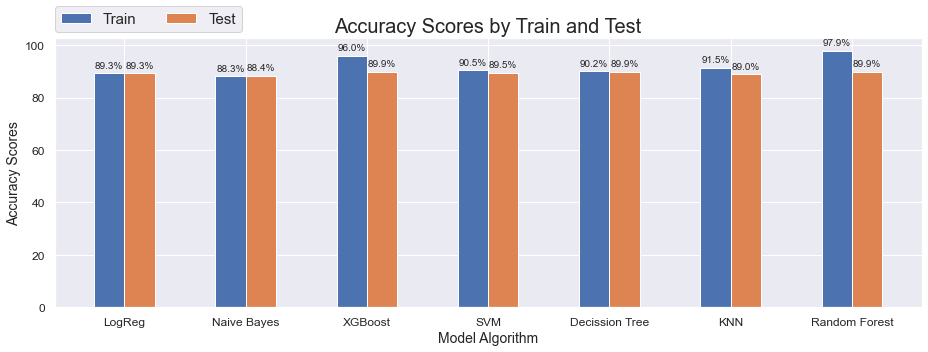

In [242]:

labels = ['LogReg','Naive Bayes','XGBoost','SVM','Decission Tree','KNN','Random Forest']
dat_train = scores_df.loc['Train']*100 
dat_test = scores_df.loc['Test'] *100

x = np.arange(len(labels))
width = 0.25

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, dat_train, width, label='Train')
rects2 = ax.bar(x + width/2, dat_test, width, label='Test')

ax.set_ylabel('Accuracy Scores')
ax.set_xlabel('Model Algorithm')
ax.set_title('Accuracy Scores by Train and Test',fontsize=20)
ax.set_xticks(x)
ax.set_xticklabels(labels)
fig.set_size_inches(13, 5, forward=True)
ax.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',
           ncol=2, borderaxespad=0.,fontsize=15)
ax.bar_label(rects1, padding=3,fmt='%.1f%%' )
ax.bar_label(rects2, padding=3, fmt='%.1f%%')

fig.tight_layout()
plt.show()

Bisa kita lihat bahwa model Random Forest untuk training dan testing memiliki skor akurasi yang lebih tinggi yaitu 97.9% dan 89.9% jika dibandingkan dengan seluruh model yang digunakan, selanjutnya diikuti oleh model XGBoost dengan skor 96.0% dan untuk skor testingnya sama dengan Random Forest yaitu 89.9%, setelah semua model tersebut di tuning. Sedangkan tingkat akurasi terendah dari semua model adalah model Gaussian Naive Bayes yaitu 88.3% dan 88.4%. Namun semua tingkat keakurasian model tergantung dengan data dan preprossing yang dilakukan.

## Model Inference

Bagian ini diisi dengan model inference, di mana model yang sudah kita latih akan dicoba pada data selain data yang sudah tersedia. Data yang dimaksud bisa berupa data buatan oleh student, ataupun data yang ada pada internet.

##### Mencoba pengujian dengan data yang dibuat student

In [64]:
df_train[feature_cols].head(2)

,age,job,marital,education,housing,poutcome,loan,duration,previous,cons.conf.idx
0,57,7,1,0,0,1,0,149,0,-36.4
1,37,7,1,0,2,1,0,226,0,-36.4


In [66]:
df_train[feature_cols].keys()

Index(['age', 'job', 'marital', 'education', 'housing', 'poutcome', 'loan',
       'duration', 'previous', 'cons.conf.idx'],
      dtype='object')

In [67]:
data_baru = [[57, 1, 1, 0, 0, 1, 1, 200, 2, -38.3],
             [55, 0, 1, 1, 3, 0, 2, 200, 3,30.5],
             [28, 0, 0, 0, 3, 0, 2, 300, 1, 20, ]]

prediksi = pd.DataFrame(data_baru)

In [68]:
prediksi.rename(columns={
    0: "age",
    1: "job",
    2: "marital",
    3: "education",
    4: "housing",
    5: "poutcome",
    6: "loan",
    7: "duration",
    8: "previous",
    9: "cons.conf.idx",

},
                inplace=True)

In [41]:
prediksi

,age,job,marital,education,housing,poutcome,loan,duration,previous,cons.conf.idx
0,57,1,1,0,0,1,1,200,2,-38.3
1,55,0,1,1,3,0,2,200,3,30.5
2,28,0,0,0,3,0,2,300,1,20.0


### Prediction

#### Model Random Forest

Melihat dari perbandingan skor antar model, kami menyimpulkan bahwa Random Forest adalah model yang terbaik, yang akan kita gunakan untuk prediksi data baru, meskipun model XGBoost memiliki skor testing yang sama namun training lebih unggul model Random Forest.

In [322]:
preds = model_rf.predict(prediksi)
result = le.inverse_transform(preds)
print('Do you want to subscribe.?')
print('====================================')
print('Hasil Prediksi:', result)
print('====================================')


Do you want to subscribe.?
Hasil Prediksi: ['yes' 'yes' 'yes']


## Pengambilan Kesimpulan

Pada bab terakhir ini, harus berisi kesimpulan yang mencerminkan hasil yang didapat dengan dibandingkan dengan objective yang sudah ditulis di bagian pengenalan.

Berdasarkan analisis yang telah dilakukan, diperoleh kesimpulan yaitu

 1. Klasifikasi prediksi subcribe 'Yes' or 'No' dari data diatas menggunakan 7 buah model dengan data training yang diujikan sebanyak 18.823 data, memiliki rata-rata akurasi klasifikasi sebesar 91.94% menggunakan fungsi Hyperparameter GridSearch dan Randomize Search. Namun demikian model dengan tingkat akurasi yang tinggi adalah Random Forest dengan akurasi skor 97.90%.
 
 
 2. Pada pengujian dengan data testing sebanyak 8.068 data menggunakan 7 buah model yang sama, akurasi klasifikasi yang didapat yaitu sebesar 89.40% menggunakan fungsi Hyperparameter GridSearch dan Randomize Search. Dari hasil testing didapatkan bahwa Random Forest dan XGBoost mempunyai skor akurasi yang sama yaitu 89.92%.


 
Dengan demikian akurasi klasifikasi terbaik untuk dataset ini adalah menggunakan Model Random Forest dengan parameters {'n_estimators': 20, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 60, 'bootstrap': False} dibandingkan dengan 6 model yang lain, walaupun akurasi skor testing untuk XGBoost mempunyai nilai yang sama namun untuk trainig model Random Forest lebih unggul.

#### ==============================================TERIMA KASIH===================================================